In [1]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

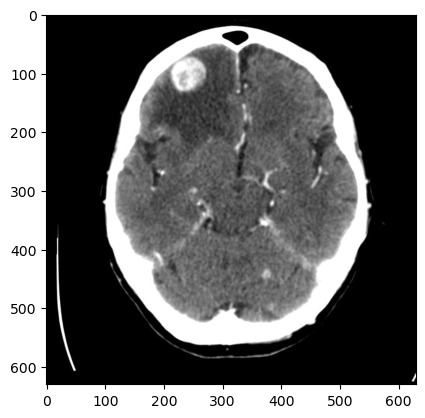

In [2]:
path = "/home/stevend/Documents/Notebooks/Dia1/imagenes/lesion.jpg"

img_gr = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

plt.imshow(img_gr, cmap="gray")

In [3]:
img_gr.shape

(630, 630)

## Binarizamos la imagen

Text(0.5, 1.0, 'binario')

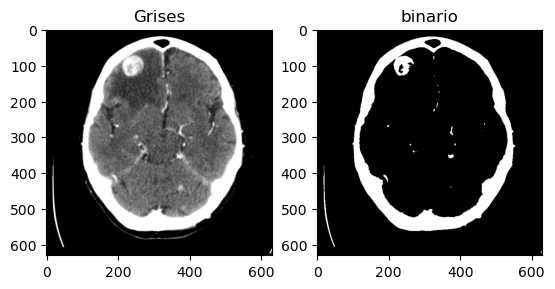

In [4]:
_, img_binary = cv2.threshold(img_gr, 200, 255, cv2.THRESH_BINARY) # grayscale (NOT RGB) -> binary image

fig, ax = plt.subplots(1,2)
ax[0].imshow(img_gr, cmap="gray")
ax[0].set_title("Grises")
ax[1].imshow(img_binary, cmap="gray")
ax[1].set_title("binario")

## Aplicamos filtros a la imagen

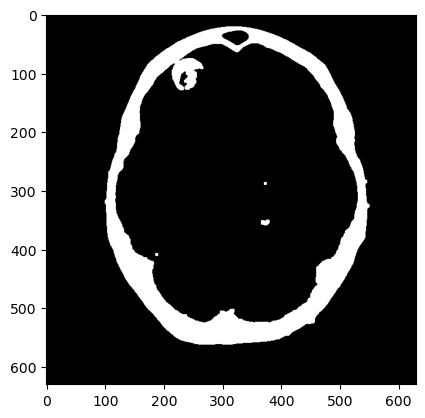

In [5]:
# Aplicar operaciones morfológicas para eliminar el ruido y los pequeños objetos
kernel = np.ones((3,3),np.uint8)
cleaned = cv2.morphologyEx(img_binary, cv2.MORPH_OPEN, kernel, iterations=2)

plt.imshow(cleaned, cmap="gray")

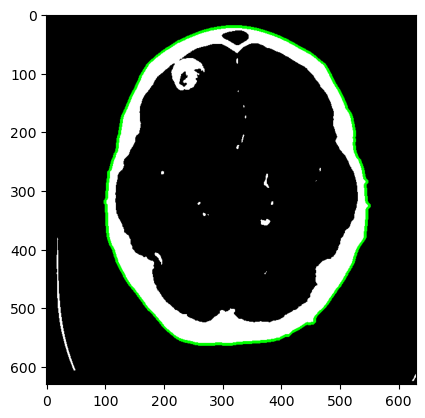

In [6]:
# Encontrar contornos de la lesión segmentada
contours, _ = cv2.findContours(cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Dibujar contornos en la imagen original
contoured_img = cv2.cvtColor(img_binary, cv2.COLOR_GRAY2RGB)  # Convertir a BGR para dibujar contornos en color
cv2.drawContours(contoured_img, contours, -1, (0,255,0), 3)

plt.imshow(contoured_img)